In [137]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):    # Sigmoid activation function
    return 1/(1+np.exp(-z))

In [138]:
# Input information for XOR problem
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# Target output
Y = np.array([[0],
              [1],
              [1],
              [0]])

In [139]:
def sigmoid_derivative(z):   #Function to calculate derivative of sigmoid function
    s=sigmoid(z)
    return s*(1-s)

In [140]:
np.random.seed(42)  # to generate same values using random during every run.    
# Initialize weights and biases randomly
w1=np.random.rand(2,2)
w2=np.random.rand(2,1)
b1=np.random.rand(1,2)
b2=np.random.rand(1,1)
alpha=0.08  #learning rate
epochs=10000
losses = []   #initialize a empty list to store losses

In [141]:
#calculate the binary cross entropy loss
def loss_claculation(y,y_hat):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [142]:
for epoch in range(epochs):
    #forward propagation
    z1=np.dot(X,w1) + b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2) + b2
    a2=sigmoid(z2)
    #calculatio of loss using binaray cross entropy
    loss=loss_claculation(Y,a2)
    losses.append(np.mean(loss))
    #backward propagation
    dz2=a2 - Y
    dw2=np.dot(a1.T, dz2)
    db2=np.sum(dz2, axis=0, keepdims=True)
    dz1=np.dot(dz2, w2.T) * sigmoid_derivative(z1)
    dw1=np.dot(X.T, dz1)
    db1=np.sum(dz1, axis=0, keepdims=True)

    #update weights and biases
    w2 -= alpha * dw2
    b2 -= alpha * db2     
    w1 -= alpha * dw1
    b1 -= alpha * db1

In [143]:
print("\nFinal predictions (rounded):")
print(a2.round())

print("\nFinal raw outputs:")
print(a2)


Final predictions (rounded):
[[0.]
 [1.]
 [1.]
 [0.]]

Final raw outputs:
[[0.00450104]
 [0.99677685]
 [0.99677413]
 [0.00336831]]


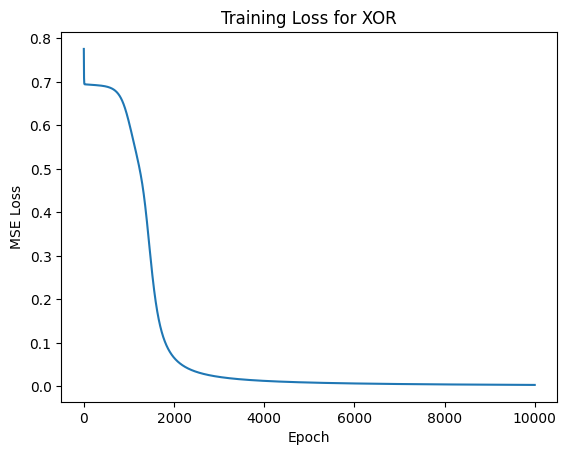

In [144]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss for XOR")
plt.show()